In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.colors as colors
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature

from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.colors as colors
import cmocean

import numpy as np
import xarray as xr
import plottools as pt

In [2]:
ds = xr.open_dataset('/glade/p/cesmdata/cseg/inputdata/ocn/pop/gx1v6/forcing/o2_consumption_scalef_0.30_POP_gx1v6_20180623.nc')
ds                    

<xarray.Dataset>
Dimensions:                (depth: 60, nlat: 384, nlon: 320)
Coordinates:
  * depth                  (depth) float64 5.0 15.0 25.0 ... 5.125e+03 5.375e+03
    TLONG                  (nlat, nlon) float64 ...
    TLAT                   (nlat, nlon) float64 ...
Dimensions without coordinates: nlat, nlon
Data variables:
    KMT                    (nlat, nlon) int32 ...
    REGION_MASK            (nlat, nlon) int32 ...
    o2_consumption_scalef  (depth, nlat, nlon) float64 ...
Attributes:
    comment:  created by /glade/u/home/klindsay/ncl/gen_o2_consumption_scalef...

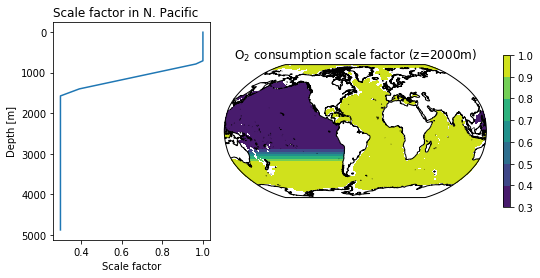

In [15]:
from matplotlib.axes import Axes
from cartopy.mpl.geoaxes import GeoAxes
GeoAxes._pcolormesh_patched = Axes.pcolormesh

fig = plt.figure(figsize=(12,4))

ax = plt.subplot2grid((1,8),(0,0),colspan=2)
ax.plot(ds.o2_consumption_scalef.isel(nlat=200,nlon=200),ds.depth)
ylm = ax.get_ylim()
ax.set_ylim(ylm[::-1])
ax.set_title('Scale factor in N. Pacific',loc='left')
ax.set_ylabel('Depth [m]')
ax.set_xlabel('Scale factor')

ax = plt.subplot2grid((1,8),(0,2),colspan=4,projection=ccrs.Robinson(central_longitude=305.0))
lon,lat,field = pt.adjust_pop_grid(ds.TLONG,ds.TLAT,ds.o2_consumption_scalef.sel(depth=2e3,method='nearest'))

#ax = fig.add_subplot(1,2,2,projection=ccrs.Robinson(central_longitude=305.0))
ax.set_global()
ax.set_title('O$_2$ consumption scale factor (z=2000m)')

cf = ax.contourf(lon,lat,field,
            levels = np.arange(0.3,1.1,0.1),
            transform=ccrs.PlateCarree(),)
ax.coastlines('50m')
plt.colorbar(cf,shrink=0.7)

plt.savefig('fig/o2-consumption-scale-factor.png',dpi=300,bbox_inches='tight')